In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision as tv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

torch.manual_seed(42)

**First Experiment**

In [ ]:
input_size = 28*28
hidden_size1 = 512
hidden_size2 = 256
num_classes = 10
num_epochs = 20
batch_size = 100
learning_rate = .001
dropout_rate = .5

In [3]:
train_dataset = tv.datasets.FashionMNIST('.', train=True, transform=tv.transforms.ToTensor(), download=True)
test_dataset = tv.datasets.FashionMNIST('.', train=False, transform=tv.transforms.ToTensor(), download=True)
train = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size)

In [4]:
train_dataset.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [5]:
train_dataset.data.shape

torch.Size([60000, 28, 28])

In [6]:
class FashionMNISTNet(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, num_classes):
        super(FashionMNISTNet, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(dropout_rate)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(dropout_rate)
        self.fc3 = nn.Linear(hidden_size2, num_classes)
    
    def forward(self, x):
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.dropout1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.dropout2(x)
        x = self.fc3(x)
        return x

In [7]:
model = FashionMNISTNet(input_size, hidden_size1, hidden_size2, num_classes).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
def train_model():
    model.train()
    for epoch in range(num_epochs):
        total_loss = 0
        correct = 0
        total = 0
        for i, (images, labels) in enumerate(train):
            images = images.to(device)
            labels = labels.to(device)
            
            outputs = model(images)
            loss = criterion(outputs, labels)
            
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            total_loss += loss.item()
        
        accuracy = 100 * correct / total
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss/len(train):.4f}, Accuracy: {accuracy:.2f}%')

def test_model():
    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        total_loss = 0
        for images, labels in test:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            total_loss += loss.item()
        
        accuracy = 100 * correct / total
        avg_loss = total_loss / len(test)
        print(f'Test Loss: {avg_loss:.4f}, Test Accuracy: {accuracy:.2f}%')
        return accuracy

In [9]:
def show_classification_results(num_samples=5):
    model.eval()
    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
                   'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    
    test_images, test_labels = next(iter(test))
    indices = random.sample(range(len(test_images)), num_samples)
    
    with torch.no_grad():
        images = test_images[indices].to(device)
        labels = test_labels[indices].to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        
        plt.figure(figsize=(20, 10))
        for i in range(num_samples):
            plt.subplot(1, num_samples, i + 1)
            plt.imshow(images[i].cpu().squeeze(), cmap='gray')
            plt.title(f'Pred: {class_names[predicted[i]]}\nTrue: {class_names[labels[i]]}')
            plt.axis('off')
        plt.show()

In [10]:
print("Training started...")
train_model()
print("\nTesting model...")
test_accuracy = test_model()

Training started...
Epoch [1/20], Loss: 0.6276, Accuracy: 77.13%
Epoch [2/20], Loss: 0.4500, Accuracy: 83.68%
Epoch [3/20], Loss: 0.4164, Accuracy: 84.89%
Epoch [4/20], Loss: 0.3984, Accuracy: 85.44%
Epoch [5/20], Loss: 0.3834, Accuracy: 86.08%
Epoch [6/20], Loss: 0.3714, Accuracy: 86.57%
Epoch [7/20], Loss: 0.3600, Accuracy: 86.72%
Epoch [8/20], Loss: 0.3565, Accuracy: 86.88%
Epoch [9/20], Loss: 0.3471, Accuracy: 87.28%
Epoch [10/20], Loss: 0.3423, Accuracy: 87.41%
Epoch [11/20], Loss: 0.3397, Accuracy: 87.55%
Epoch [12/20], Loss: 0.3323, Accuracy: 87.82%
Epoch [13/20], Loss: 0.3261, Accuracy: 88.00%
Epoch [14/20], Loss: 0.3226, Accuracy: 88.16%
Epoch [15/20], Loss: 0.3176, Accuracy: 88.23%
Epoch [16/20], Loss: 0.3137, Accuracy: 88.36%
Epoch [17/20], Loss: 0.3101, Accuracy: 88.53%
Epoch [18/20], Loss: 0.3064, Accuracy: 88.84%
Epoch [19/20], Loss: 0.3079, Accuracy: 88.78%
Epoch [20/20], Loss: 0.2998, Accuracy: 88.86%

Testing model...
Test Loss: 0.3249, Test Accuracy: 88.63%


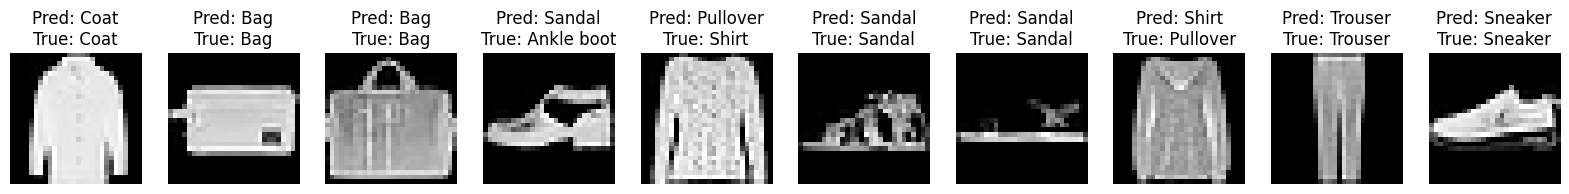

In [11]:
show_classification_results(10)

**Second Experiment**

In [13]:
input_size = 28*28
hidden_size1 = 512
hidden_size2 = 256
hidden_size3 = 128
num_classes = 10
num_epochs = 30
batch_size = 256
learning_rate = .001
dropout_rate = .25

In [14]:
class FashionMNISTNet(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, hidden_size3, num_classes):
        super(FashionMNISTNet, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(dropout_rate)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(dropout_rate)
        self.fc3 = nn.Linear(hidden_size2, hidden_size3)
        self.relu3 = nn.ReLU()
        self.dropout3 = nn.Dropout(dropout_rate)
        self.fc4 = nn.Linear(hidden_size3, num_classes)
    
    def forward(self, x):
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.dropout1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.dropout2(x)
        x = self.fc3(x)
        x = self.relu3(x)
        x = self.dropout3(x)
        x = self.fc4(x)
        return x

In [15]:
model = FashionMNISTNet(input_size, hidden_size1, hidden_size2, hidden_size3, num_classes).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [16]:
print("Training started...")
train_model()
print("\nTesting model...")
test_accuracy = test_model()

Training started...
Epoch [1/30], Loss: 0.5997, Accuracy: 78.12%
Epoch [2/30], Loss: 0.4164, Accuracy: 84.93%
Epoch [3/30], Loss: 0.3756, Accuracy: 86.33%
Epoch [4/30], Loss: 0.3534, Accuracy: 87.11%
Epoch [5/30], Loss: 0.3335, Accuracy: 87.79%
Epoch [6/30], Loss: 0.3231, Accuracy: 88.11%
Epoch [7/30], Loss: 0.3121, Accuracy: 88.46%
Epoch [8/30], Loss: 0.3011, Accuracy: 88.95%
Epoch [9/30], Loss: 0.2948, Accuracy: 89.18%
Epoch [10/30], Loss: 0.2843, Accuracy: 89.47%
Epoch [11/30], Loss: 0.2771, Accuracy: 89.77%
Epoch [12/30], Loss: 0.2727, Accuracy: 89.83%
Epoch [13/30], Loss: 0.2677, Accuracy: 90.11%
Epoch [14/30], Loss: 0.2612, Accuracy: 90.30%
Epoch [15/30], Loss: 0.2589, Accuracy: 90.27%
Epoch [16/30], Loss: 0.2511, Accuracy: 90.59%
Epoch [17/30], Loss: 0.2503, Accuracy: 90.79%
Epoch [18/30], Loss: 0.2458, Accuracy: 90.75%
Epoch [19/30], Loss: 0.2410, Accuracy: 91.04%
Epoch [20/30], Loss: 0.2384, Accuracy: 90.98%
Epoch [21/30], Loss: 0.2334, Accuracy: 91.19%
Epoch [22/30], Loss: 0.

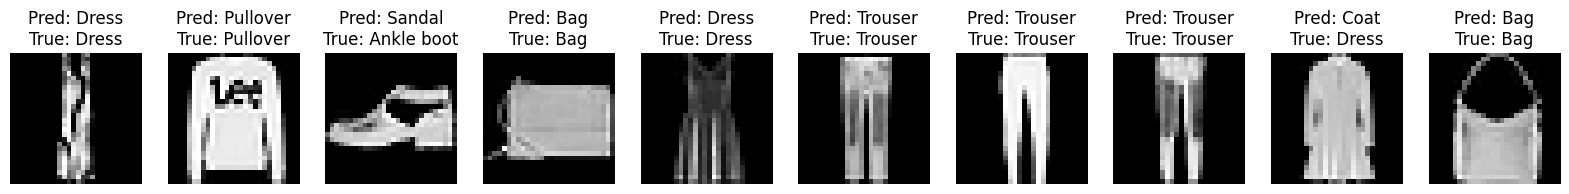

In [24]:
show_classification_results(10)